<a href="https://colab.research.google.com/github/mcasber/analisis_chess/blob/main/PCA_teoria_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivo principal PCA

Crear 'constructos' que capten el comportamiento de un grupo de variables.


Esta reduccion es util cuando se tiene una gran cantidad de datos.

También para analizar comportamientos que no son medibles directamente.

Veamos el ejemplo de perfiles de estudiantes a partir de analizar sus calificaciones:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = {'sociales':  [3,4,9,10,8],
         'naturales': [5,5,8,10,9],
         'fisica':    [10,8,3,4,5],
         'algebra':   [8,9,5,5,3],
         }

datos = pd.DataFrame(datos)
datos.head(5)

,sociales,naturales,fisica,algebra
0,3,5,10,8
1,4,5,8,9
2,9,8,3,5
3,10,10,4,5
4,8,9,5,3


In [ ]:
#veamos como son los datos
datos.describe()

,sociales,naturales,fisica,algebra
count,5.000000,5.000000,5.000000,5.00000
mean,6.800000,7.400000,6.000000,6.00000
std,3.114482,2.302173,2.915476,2.44949
min,3.000000,5.000000,3.000000,3.00000
25%,4.000000,5.000000,4.000000,5.00000
50%,8.000000,8.000000,5.000000,5.00000
75%,9.000000,9.000000,8.000000,8.00000
max,10.000000,10.000000,10.000000,9.00000


#Obtención de componentes principales

In [ ]:
#Primero Estandarizamos los datos
from sklearn.preprocessing import StandardScaler
#df_scaler = pd.DataFrame(StandardScaler().fit_transform(datos), columns=datos.columns) #esto seria en un paso, pero necesitamos mas adelante el objeto escalador para invertir el prpceso

escalador = StandardScaler()
df_scaler = pd.DataFrame(escalador.fit_transform(datos), columns=datos.columns)
df_scaler.head(5)


,sociales,naturales,fisica,algebra
0,-1.364121,-1.165543,1.533930,0.912871
1,-1.005141,-1.165543,0.766965,1.369306
2,0.789754,0.291386,-1.150447,-0.456435
3,1.148733,1.262672,-0.766965,-0.456435
4,0.430775,0.777029,-0.383482,-1.369306


In [ ]:
from sklearn.decomposition import PCA

pca = PCA() #generamos su instancia
df_pca = pca.fit_transform(df_scaler) #y a traves del metodo fit_transform le pasamos nuestros datos

##Conceptos

Funciones de `fit` y `transform`

1. **`fit`**:
   - Este método se utiliza para calcular los componentes principales a partir de los datos originales. Durante este proceso, PCA determina la dirección de máxima varianza y calcula la matriz de transformación.
   - Al final de este paso, PCA guarda información sobre las componentes principales (eigenvectores) y la varianza explicada (eigenvalores).

2. **`transform`**:
   - Este método aplica la transformación que se calculó en el paso de `fit` a los datos que le pasas. En este caso, toma los datos escalados (`df_scaler`) y los proyecta en el nuevo espacio de componentes principales.
   - El resultado, `X_pca`, es una representación de tus datos originales pero en un espacio reducido, donde las dimensiones corresponden a los componentes principales elegidos.

Resumen
- **`fit`** se usa para entrenar el modelo y calcular las componentes principales.
- **`transform`** se usa para aplicar esas componentes a tus datos y obtener la representación en el nuevo espacio.

En resumen, `X_pca = pca.transform(df_scaler)` te da las nuevas coordenadas de tus datos en el espacio de los componentes principales, permitiéndote trabajar con una versión reducida pero informativa de tus datos originales.

#Atributos

In [ ]:
print(f"Varianza por componente:\n", [f"{x:.4f}" for x in pca.explained_variance_])
print(f"Varianza acumulada:\n", pca.explained_variance_.sum())

Varianza por componente:
 ['4.5361', '0.3371', '0.1248', '0.0020']
Varianza acumulada:
 4.999999999999996


explained_variance_: Cuánto de la dispersión total explica cada componente. Su suma es la varianza total de tus datos estandarizados.

explained_variance_ratio_: Qué porcentaje de la dispersión total explica cada componente. Su suma siempre será 1 (o 100%).

In [ ]:
print("% dispersion explicada por cada componente %:\n", [f"{x:.4f}%" for x in pca.explained_variance_ratio_])
print(f"% dispersion explicada acumulada:\n", pca.explained_variance_ratio_.sum())

% dispersion explicada por cada componente %:
 ['0.9072%', '0.0674%', '0.0250%', '0.0004%']
% dispersion explicada acumulada:
 1.0


#Conclusiones

Dice: % dispersion explicada por cada componente %: ['0.9072%', '0.0674%', '0.0250%', '0.0004%'] , si entiendo bien podria decir que si realizo una reduccion a pc1 voy a capturar casi el 91% de indformacion?

¡Exacto! Tu interpretación es completamente correcta. Si decides quedarte solo con la primera componente principal (PC1), estarías capturando aproximadamente el 90.72% de la varianza total (o "información") presente en tus datos originales. Esto es precisamente lo que hace que PCA sea tan poderoso para la reducción de dimensionalidad.

Al capturar casi el 91% de la varianza con una sola componente, puedes representar la mayor parte de la información relevante de tus cuatro variables originales (sociales, naturales, fisica, algebra) en una sola nueva variable (PC1), simplificando enormemente el análisis sin perder demasiada información.

y en este ejemplo de notas de alumnos es muy poco lo que me aporta si sumo pc2 ?

Es una excelente observación y va directamente al grano de la reducción de dimensionalidad.

Si bien PC1 captura la mayor parte (90.72%) de la varianza, PC2 aporta un 6.74% adicional de la varianza total. Si sumas la varianza explicada por PC1 y PC2, obtendrías aproximadamente 90.72% + 6.74% = 97.46%.

Esto significa que al considerar solo las dos primeras componentes principales (PC1 y PC2), estarías capturando casi el 97.5% de toda la información (varianza) contenida en tus cuatro variables originales.

Ahora, si ese 6.74% de PC2 es 'muy poco' o no, depende del contexto y del nivel de precisión que necesites para tu análisis. Para muchos propósitos, capturar el 97.5% de la información con solo dos dimensiones de cuatro es una reducción muy eficiente y efectiva. Si necesitas un modelo muy preciso, quizás ese 6.74% sea relevante, pero si tu objetivo principal es simplificar y visualizar, puede que sea suficiente con PC1, o PC1 y PC2.

#Reduccion de dimensionalidad

In [ ]:
# Creamos una nueva instancia de PCA especificando n_components= x
pca_dos_component = PCA(n_components=2)

# Aplicamos fit_transform a los datos escalados
df_pca_dos = pca_dos_component.fit_transform(df_scaler)

In [ ]:
type(pca_dos_component)

sklearn.decomposition._pca.PCA

In [ ]:
df_pca_dos

array([[-2.49423305, -0.41669464],
       [-2.1472929 ,  0.46597168],
       [ 1.34399031,  0.50213887],
       [ 1.83464548,  0.25025944],
       [ 1.46289016, -0.80167535]])

Ahora vemos que % nos quedamos

In [ ]:
print("% dispersion explicada por cada componente %:\n", pca_dos_component.explained_variance_ratio_)
print(f"% dispersion explicada acumulada:\n", pca_dos_component.explained_variance_ratio_.sum())

% dispersion explicada por cada componente %:
 [0.90721735 0.06741103]
% dispersion explicada acumulada:
 0.9746283777976


In [ ]:
# Convertimos el resultado a un DataFrame para una mejor visualización
df_pca_dos = pd.DataFrame(df_pca_dos, columns=['pc1','pc2'])

df_pca_dos.head()


,pc1,pc2
0,-2.494233,-0.416695
1,-2.147293,0.465972
2,1.343990,0.502139
3,1.834645,0.250259
4,1.462890,-0.801675


#Invertimos el proceso de estandarizacion

**Esto es para tener una idea de lo que hizo el proceso con las notas originales**

Las notas originales del alumno con índice 0 eran sociales: 3, naturales: 5, fisica: 10, algebra: 8.

Y como te mostré, después de pasar por la reducción de dimensionalidad a dos componentes principales y luego reconstruir, sus notas aproximadas se veían como: sociales: 2.838, naturales: 4.919, fisica: 9.821, algebra: 7.926.

Esta es la clave para entender que, al reducir la dimensionalidad de 4 a 2 componentes principales, estamos simplificando la información y, por lo tanto, la reconstrucción de las notas originales es una aproximación, no una recuperación idéntica. **La diferencia entre [3, 5, 10, 8] y [2.838, 4.919, 9.821, 7.926] es precisamente el 'costo' o la 'pérdida de información' que aceptamos a cambio de tener una representación más simple de los datos con solo dos dimensiones.**

## Reconstrucción del Proceso Inverso Paso a Paso

El objetivo es pasar de las 2 Componentes Principales (`pc1`, `pc2`) a una aproximación de las 4 notas originales (`sociales`, `naturales`, `fisica`, `algebra`). Este proceso se realiza en dos etapas:

### Paso 1: Invertir la Transformación PCA (de 2 PCs a 4 variables Estandarizadas)

Primero, usamos el método **`inverse_transform`** del objeto PCA (`pca_dos_component`) que creamos con `n_components=2`. Esto proyecta los datos de las dos componentes principales (`df_pca_dos`) de vuelta al espacio de las 4 variables originales, pero **en su versión estandarizada**.

In [ ]:
# Reconstruir los datos estandarizados desde las dos componentes principales
df_reconstructed_standardized_step = pca_dos_component.inverse_transform(df_pca_dos.values)
df_reconstructed_standardized_step

array([[-1.42227451, -1.20482678,  1.46537716,  0.87922145],
       [-0.95605133, -1.17061863,  0.80644808,  1.37595631],
       [ 0.85672072,  0.60431034, -0.94279549, -0.26538402],
       [ 1.02785775,  0.89531238, -1.04682904, -0.68893176],
       [ 0.49374737,  0.87582269, -0.28220071, -1.30086198]])

In [ ]:
# Convertir a DataFrame para mejor visualización y asignar los nombres originales de las columnas
df_reconstructed_standardized_step = pd.DataFrame(df_reconstructed_standardized_step, columns=datos.columns)

print("Datos reconstruidos en la escala estandarizada (primeras 5 filas):")
display(df_reconstructed_standardized_step.head())

Datos reconstruidos en la escala estandarizada (primeras 5 filas):


,sociales,naturales,fisica,algebra
0,-1.422275,-1.204827,1.465377,0.879221
1,-0.956051,-1.170619,0.806448,1.375956
2,0.856721,0.604310,-0.942795,-0.265384
3,1.027858,0.895312,-1.046829,-0.688932
4,0.493747,0.875823,-0.282201,-1.300862


####Nota:
bien, y cuando realizo la inversa : pca_dos_component.inverse_transform(df_pca_dos.values) como entiende que de 2 lo descompone a 4 dimensiones?

Excelente pregunta, es una parte clave para entender la reconstrucción. Cuando haces pca_dos_component.inverse_transform(df_pca_dos.values), el objeto pca_dos_component ya ha sido 'entrenado' con tus datos originales (a través del fit_transform anterior) y por lo tanto 'sabe' la dimensionalidad original de tus datos (4 variables).

Aunque le especificaste n_components=2 para la transformación hacia adelante, el objeto PCA, durante el fit, calculó y almacenó la matriz de componentes (los autovectores) que mapea el espacio original de 4 dimensiones al espacio de componentes principales. El inverse_transform utiliza precisamente esta matriz de componentes para proyectar los datos de vuelta al espacio de las 4 variables originales.

Es importante recordar que este proceso es una reconstrucción aproximada. Debido a que solo retuviste 2 componentes principales (y por lo tanto descartaste la varianza explicada por las otras dos componentes), la inverse_transform no te devolverá exactamente los datos originales, sino la mejor aproximación posible de los datos en el espacio de 4 dimensiones utilizando solo la información contenida en las 2 componentes principales.

### Paso 2: Des-estandarizar los Datos Reconstruidos (de 4 variables Estandarizadas a 4 variables Originales)

Ahora que tenemos la aproximación de las 4 variables en su escala estandarizada, utilizamos el método `inverse_transform` de nuestro `escalador` original (que se ajustó a los `datos` sin estandarizar) para devolverlos a la escala de notas original.

In [ ]:
# Des-estandarizar los datos reconstruidos para volver a la escala original
df_reconstructed_original_step = escalador.inverse_transform(df_reconstructed_standardized_step.values)
df_reconstructed_original_step

array([[2.83800166, 4.91910983, 9.82123613, 7.92627768],
       [4.13674918, 4.98954871, 8.10295931, 9.01456924],
       [9.18654778, 8.64435115, 3.54149014, 5.41857275],
       [9.66328037, 9.24356102, 3.27020384, 4.49062614],
       [8.17542102, 9.2034293 , 5.26411057, 3.14995419]])

In [ ]:
# Convertir a DataFrame para mejor visualización y asignar los nombres originales de las columnas
df_reconstructed_original_step = pd.DataFrame(df_reconstructed_original_step, columns=datos.columns)

print("Datos reconstruidos en la escala original (primeras 5 filas):")
display(df_reconstructed_original_step.head())

Datos reconstruidos en la escala original (primeras 5 filas):


,sociales,naturales,fisica,algebra
0,2.838002,4.919110,9.821236,7.926278
1,4.136749,4.989549,8.102959,9.014569
2,9.186548,8.644351,3.541490,5.418573
3,9.663280,9.243561,3.270204,4.490626
4,8.175421,9.203429,5.264111,3.149954


### Comparación Final

Como puedes ver, `df_reconstructed_original_step` es una aproximación de los `datos` originales. Las pequeñas diferencias entre ambos DataFrames son el resultado de haber 'condensado' la información de 4 dimensiones a 2 componentes principales.

In [ ]:
print("Datos originales (primeras 5 filas):")
display(datos.head())

print("Diferencia absoluta entre original y reconstruido (primeras 5 filas):")
display(abs(datos - df_reconstructed_original_step).head())

Datos originales (primeras 5 filas):


,sociales,naturales,fisica,algebra
0,3,5,10,8
1,4,5,8,9
2,9,8,3,5
3,10,10,4,5
4,8,9,5,3


Diferencia absoluta entre original y reconstruido (primeras 5 filas):


,sociales,naturales,fisica,algebra
0,0.161998,0.080890,0.178764,0.073722
1,0.136749,0.010451,0.102959,0.014569
2,0.186548,0.644351,0.541490,0.418573
3,0.336720,0.756439,0.729796,0.509374
4,0.175421,0.203429,0.264111,0.149954


#Notas y analisis:

bien , muy buenos los step , analizo y veo que siempre resta a los datos originales , o sea cuando lo ajusto las notas son siempre levemente inferiores

¡Excelente observación! Es muy perspicaz notar esas diferencias. No es que 'siempre resta' o que las notas sean siempre inferiores, sino que lo que estás viendo es la consecuencia directa de la pérdida de información que ocurre al reducir la dimensionalidad. Permíteme explicarte:

Aproximación, no Reconstrucción Perfecta: Cuando utilizas PCA con n_components menor que el número original de variables (en tu caso, 2 componentes en lugar de 4 variables), el proceso inverse_transform no puede reconstruir los datos originales de forma idéntica. Lo que hace es generar la mejor aproximación posible de los datos en el espacio original, utilizando solo la información capturada por las componentes principales que has conservado.

Varianza Descartada: Recuerda que las componentes que descartamos (PC3 y PC4) también explicaban una pequeña parte de la varianza (0.0250% y 0.0004% respectivamente). Aunque es un porcentaje pequeño, es información que se pierde. Esta 'información perdida' se traduce en esas pequeñas desviaciones entre los datos originales y los reconstruidos.

Generalización y Reducción de Ruido: A menudo, la reducción de dimensionalidad puede tener un efecto de 'suavizado' o 'generalización'. Al descartar las componentes con menor varianza, a veces también se descarta ruido o peculiaridades muy específicas de los datos que las componentes principales más grandes consideran menos relevantes. Esto puede hacer que los valores reconstruidos estén ligeramente más cerca del 'promedio' o del 'patrón principal' de los datos, lo que puede manifestarse como valores ligeramente más bajos o más altos que los originales, dependiendo de cada punto de dato.

Esas pequeñas diferencias que observas son precisamente el 'costo' que se paga por tener una representación mucho más simple y compacta de los datos. La idea es que la información más importante (la que explica la mayor parte de la varianza) se ha mantenido intacta en las dos primeras componentes, y lo que se pierde es detalle menor.

##Aplicacion en modelos ml

todo esto me hace pensar que para el entrenamiento de un modelo aplicando pca para reducir dimensiones hace que al realizar predicciones el retorno sera en ese sistema reducido y tenga que realizar lo sprocesos inversos para obtener el resultado en el sistema real.

¡Exactamente! Has captado un punto crucial de cómo se integra PCA en un pipeline de machine learning para reducción de dimensionalidad. Estás en lo cierto:

Si utilizas PCA para reducir las dimensiones de tus datos antes de entrenar un modelo predictivo, tu modelo estará 'aprendiendo' y haciendo predicciones en ese espacio de dimensiones reducido (por ejemplo, con las 2 componentes principales en lugar de las 4 variables originales).

Por lo tanto, cuando quieras interpretar o utilizar esas predicciones en el contexto original (es decir, en las unidades y significados de tus variables iniciales), necesitarás realizar el proceso inverso (inverse_transform) para 'desplegar' el resultado de vuelta al espacio de las dimensiones originales.

Es fundamental recordar que, como hemos visto, esta reconstrucción es una aproximación. Las predicciones 'reconstruidas' serán las mejores estimaciones posibles de lo que el modelo hubiera predicho en el espacio original, pero con la 'pérdida de información' inherente a la reducción dimensional. Es una compensación: ganas en eficiencia y a menudo en la capacidad del modelo para generalizar (al reducir ruido y redundancia), a cambio de una ligera imprecisión en la reconstrucción.

#Bonus: coordenadas - atributo components_

In [ ]:
print("Coordenadas de los componentes principales (PCA original con 4 componentes):\n", pca.components_)

Coordenadas de los componentes principales (PCA original con 4 componentes):
 [[ 0.51585673  0.51006412 -0.49531511 -0.47790101]
 [ 0.32543643 -0.16172995 -0.55183297  0.75060971]
 [ 0.22004215  0.69666231  0.5228905   0.43912254]
 [ 0.76129129 -0.47784898  0.4203913  -0.12396406]]


El atributo pca.components_ es uno de los más importantes de PCA, ya que contiene los vectores de los componentes principales (también conocidos como eigenvectores).

Cada fila en esta matriz representa un componente principal (PC1, PC2, etc.). Cada columna corresponde a una de tus variables originales (en este caso, sociales, naturales, fisica, algebra).

Los valores dentro de la matriz son los pesos (o loadings) que cada variable original tiene en cada componente principal. Estos pesos indican la dirección y la fuerza con la que cada variable original contribuye a ese componente. Los valores absolutos más grandes (sin importar si son positivos o negativos) indican una mayor influencia de esa variable en el componente.

En tu ejemplo:

[[ 0.51585673  0.51006412 -0.49531511 -0.47790101]
 [ 0.32543643 -0.16172995 -0.55183297  0.75060971]
 [ 0.22004215  0.69666231  0.5228905   0.43912254]
 [ 0.76129129 -0.47784898  0.4203913  -0.12396406]]
Primera fila (PC1): [ 0.51585673, 0.51006412, -0.49531511, -0.47790101]

Vemos que sociales (0.51), naturales (0.51), fisica (-0.49) y algebra (-0.47) tienen pesos altos en valor absoluto. Esto sugiere que PC1 es una combinación de todas las materias, pero con sociales y naturales aportando positivamente, y fisica y algebra aportando negativamente. Esto podría interpretarse como un componente que diferencia a los estudiantes buenos en materias humanísticas/biológicas de los buenos en materias exactas.
Segunda fila (PC2): [ 0.32543643, -0.16172995, -0.55183297, 0.75060971]

Aquí, algebra (0.75) tiene un peso positivo muy alto, mientras que fisica (-0.55) tiene un peso negativo alto. sociales (0.32) también contribuye. Esto podría indicar un componente que contrasta la habilidad en algebra con la habilidad en fisica, quizás aislando a estudiantes con fuerte inclinación hacia una u otra.
En resumen, pca.components_ te dice cómo se forman los componentes principales a partir de tus variables originales. Es fundamental para interpretar qué 'significa' cada componente.

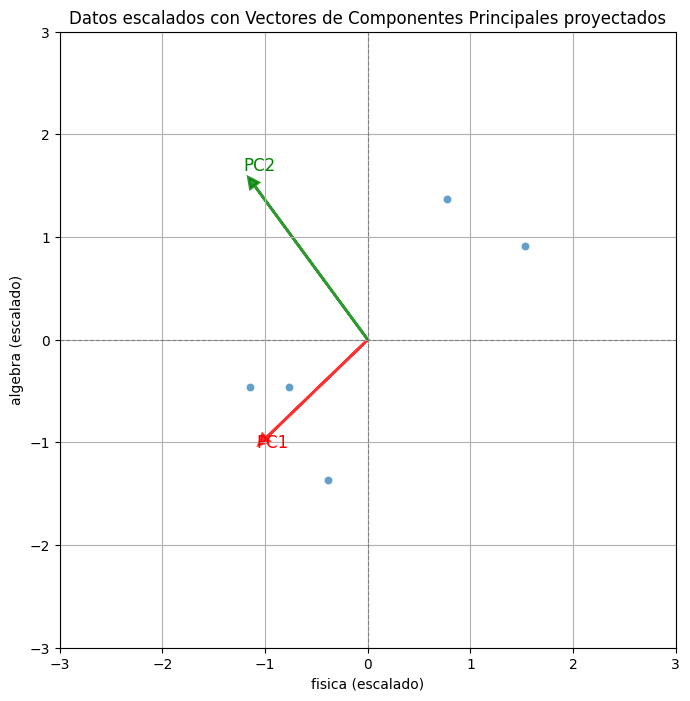

In [ ]:
# Obtener los índices de 'fisica' y 'algebra' en las columnas originales
fisica_idx = datos.columns.get_loc('fisica')
algebra_idx = datos.columns.get_loc('algebra')

plt.figure(figsize=(8, 8))
sns.scatterplot(x=df_scaler['fisica'], y=df_scaler['algebra'], alpha=0.7)

# Obtener los componentes principales (vectores)
# 'pca' es la instancia original de PCA que calculó las 4 componentes
components = pca.components_

# Para PC1 (primera fila de components_)
# El eje X será el loading de 'fisica' en PC1 (components[0, fisica_idx])
# El eje Y será el loading de 'algebra' en PC1 (components[0, algebra_idx])
plt.arrow(0, 0, components[0, fisica_idx]*2, components[0, algebra_idx]*2,
          color='red', alpha=0.8, linewidth=2, head_width=0.1, head_length=0.1)
plt.text(components[0, fisica_idx]*2.2, components[0, algebra_idx]*2.2, 'PC1',
         color='red', fontsize=12)

# Para PC2 (segunda fila de components_)
# El eje X será el loading de 'fisica' en PC2 (components[1, fisica_idx])
# El eje Y será el loading de 'algebra' en PC2 (components[1, algebra_idx])
plt.arrow(0, 0, components[1, fisica_idx]*2, components[1, algebra_idx]*2,
          color='green', alpha=0.8, linewidth=2, head_width=0.1, head_length=0.1)
plt.text(components[1, fisica_idx]*2.2, components[1, algebra_idx]*2.2, 'PC2',
         color='green', fontsize=12)

plt.xlabel('fisica (escalado)')
plt.ylabel('algebra (escalado)')
plt.title('Datos escalados con Vectores de Componentes Principales proyectados')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlim([-3, 3]) # Ajusta los límites si tus datos escalados tienen un rango mayor
plt.ylim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()